In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

#Display the names and number of class labels from the dataset folder:

#List all the folder names(class labels) inside the dataset folder
dataset_path = os.listdir('/content/drive/MyDrive/B3/DL/Eggs Classification')

#Display the class labels names
print(dataset_path)

#Display the number of class labels
print('Types of class labels found: ', len(dataset_path))

['Not Damaged', 'Damaged']
Types of class labels found:  2


In [ ]:
# --- Import dependencies ---
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np

# --- Define dataset paths ---
damaged_dir = '/content/drive/MyDrive/B3/DL/Eggs Classification/Damaged'
not_damaged_dir = '/content/drive/MyDrive/B3/DL/Eggs Classification/Not Damaged'  # minority class

# --- Count images ---
num_damaged = len(os.listdir(damaged_dir))
num_not_damaged = len(os.listdir(not_damaged_dir))

print(f"Damaged: {num_damaged} images")
print(f"Not damaged: {num_not_damaged} images")


Damaged: 632 images
Not damaged: 162 images


In [ ]:
target_num = num_damaged
current_num = num_not_damaged
to_generate = target_num - current_num
augment_per_image = to_generate // current_num + 1

print(f"Will generate about {to_generate} new images...")
print(f"Augmenting each 'not damaged' image about {augment_per_image} times.")

# --- Define augmentation generator ---
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# --- Perform augmentation directly into same folder ---
generated = 0
for img_name in os.listdir(not_damaged_dir):
    img_path = os.path.join(not_damaged_dir, img_name)
    try:
        img = load_img(img_path)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=not_damaged_dir,
                                  save_prefix='aug',
                                  save_format='jpg'):
            i += 1
            generated += 1
            if i >= augment_per_image or generated >= to_generate:
                break

        if generated >= to_generate:
            break
    except Exception as e:
        print(f"Skipped {img_name}: {e}")

print(f"✅ Done! Generated {generated} new images inside {not_damaged_dir}")

Will generate about 470 new images...
Augmenting each 'not damaged' image about 3 times.
✅ Done! Generated 470 new images inside /content/drive/MyDrive/B3/DL/Eggs Classification/Not Damaged


In [ ]:
#Check again
num_damaged = len(os.listdir(damaged_dir))
num_not_damaged = len(os.listdir(not_damaged_dir))

print(f"Damaged: {num_damaged} images")
print(f"Not damaged: {num_not_damaged} images")

Damaged: 632 images
Not damaged: 619 images


In [ ]:
#Put all the images into a single list for easier working

class_labels = [] #list to hold all the image file names

#Loop through all class folders inside the dataset
for item in dataset_path:
  #Get all the file names inside each class folder
  all_classes = os.listdir('/content/drive/MyDrive/B3/DL/Eggs Classification' + '/' + item)

  #Add them to the list
  for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' + item) + '/' + room))
    print(class_labels[-1]) #Display all file names(which are appended inside a single list)

('Not Damaged', 'dataset_path/Not Damaged/not_damaged_133.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_10.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_119.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_103.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_131.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_156.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_105.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_100.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_108.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_132.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_117.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_141.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_145.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_113.jpg')
('Not Damaged', 'dataset_path/Not Damaged/not_damaged_11.jpg')
('Not Damaged', 'dataset_path/Not Damaged/

In [ ]:
#Build a dataframe which consist of 2 columns: the image file names and their corresponding class label
df = pd.DataFrame(data=class_labels, columns=['Labels', 'File'])
print(df.head())
print(df.tail())

        Labels                                          File
0  Not Damaged  dataset_path/Not Damaged/not_damaged_133.jpg
1  Not Damaged   dataset_path/Not Damaged/not_damaged_10.jpg
2  Not Damaged  dataset_path/Not Damaged/not_damaged_119.jpg
3  Not Damaged  dataset_path/Not Damaged/not_damaged_103.jpg
4  Not Damaged  dataset_path/Not Damaged/not_damaged_131.jpg
       Labels                                  File
1246  Damaged   dataset_path/Damaged/damaged_67.jpg
1247  Damaged   dataset_path/Damaged/damaged_84.jpg
1248  Damaged   dataset_path/Damaged/damaged_73.jpg
1249  Damaged  dataset_path/Damaged/damaged_612.jpg
1250  Damaged  dataset_path/Damaged/damaged_629.jpg


In [ ]:
#Display the number of samples for each label

#Total number of samples inside the dataset
print("Total number of images in the dataset: ", len(df))

#Number of samples in each class label(count directly from the dataframe we just built)
label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1251
Labels
Damaged        632
Not Damaged    619
Name: count, dtype: int64


In [ ]:
#Resize the images to 256x256
import cv2
path = '/content/drive/MyDrive/B3/DL/Eggs Classification/'
dataset_path = os.listdir('/content/drive/MyDrive/B3/DL/Eggs Classification')
im_size = 256

images = [] #list to hold resized image data
labels = [] #list to hold the corresponding class label(folder name) for each image

for i in dataset_path:
  #construct the full path for the current folder
  data_path = path + str(i)
  #list to hold name of files inside the folder
  filenames = [i for i in os.listdir(data_path)]

  for f in filenames:
    #read the image file from disk
    img = cv2.imread(data_path + '/' + f)
    #resize the image to 256x256
    # Check if the image was loaded successfully
    if img is not None:
      #resize the image to 256x256
      img = cv2.resize(img, (im_size, im_size))
      images.append(img)
      labels.append(i)
    else:
      print(f"Failed to load image: {data_path + '/' + f}")

#convert the list of images into a numpy array
images = np.array(images)

#Normalize the pixel values:
#   astype('float 32'): Converts all pixel values from integers (0–255) to 32-bit floating-point numbers.
#   /255: Normalizes pixel values from the range [0, 255] to the range [0.0, 1.0].
images = images.astype('float32')/255
#Return the shape of the array:
#   1357 images, each image is 256 by 256 pixels
#   3 color channels(RGB)
images.shape

(1251, 256, 256, 3)

In [ ]:
#Encode categorical labels into numeric form(Not Damaged = 1, Damaged = 0)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Display all the class labels of each sample in the dataset(which is still in the categorical form)
y = df['Labels'].values
print(y)

#Encode to numeric form
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)

# Assuming y is the encoded labels
import numpy as np
print(np.unique(y))

['Not Damaged' 'Not Damaged' 'Not Damaged' ... 'Damaged' 'Damaged'
 'Damaged']
[1 1 1 ... 0 0 0]
[0 1]


In [ ]:
#One hot encoding
y = y.reshape(-1, 1)

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(y).toarray()
print(Y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
#Shuffle & split the dataset into training set & validation test & testing set
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# First split into train + validation and test
images, Y = shuffle(images, Y, random_state=1)
X_train_val, X_test, y_train_val, y_test = train_test_split(images, Y, test_size=0.1, random_state=1)

# Then split train + validation into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(900, 256, 256, 3)
(900, 2)
(225, 256, 256, 3)
(225, 2)
(126, 256, 256, 3)
(126, 2)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Rescaling # import Rescaling directly
from tensorflow.keras.callbacks import TensorBoard

model = Sequential()

model.add(Conv2D(16, (3, 3), activation = "relu", input_shape=(256,256,3)))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (2, 2), activation = "relu"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

tensorboard_callback = TensorBoard(log_dir='./logs')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,386,530 (28.18 MB)

 Trainable params: 7,386,530 (28.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,y_train, epochs=20, validation_data=(X_val, y_val),callbacks=[tensorboard_callback])

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5194 - loss: 3.1456 - val_accuracy: 0.5333 - val_loss: 0.6930
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5686 - loss: 0.6848 - val_accuracy: 0.6222 - val_loss: 0.6868
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.5587 - loss: 0.6608 - val_accuracy: 0.6089 - val_loss: 0.6693
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.6509 - loss: 0.6159 - val_accuracy: 0.7289 - val_loss: 0.6078
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7342 - loss: 0.5366 - val_accuracy: 0.7689 - val_loss: 0.5494
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.7852 - loss: 0.4629 - val_accuracy: 0.7556 - val_loss: 0.5527
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7799 - loss: 0.4598 - val_accuracy: 0.7822 - val_loss: 0.4966
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.8110 - loss: 0.4255 - val_accuracy: 0.8089 - val_loss:

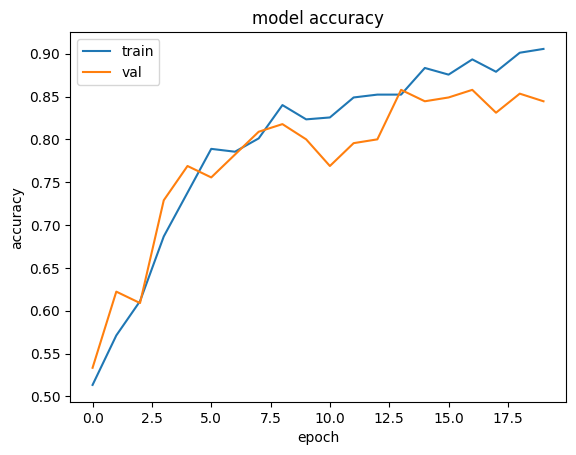

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.plot(history.history["accuracy"])
  plt.plot(history.history["val_accuracy"])
  plt.title("model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "val"], loc="upper left")
  plt.show()

plot_history(history)

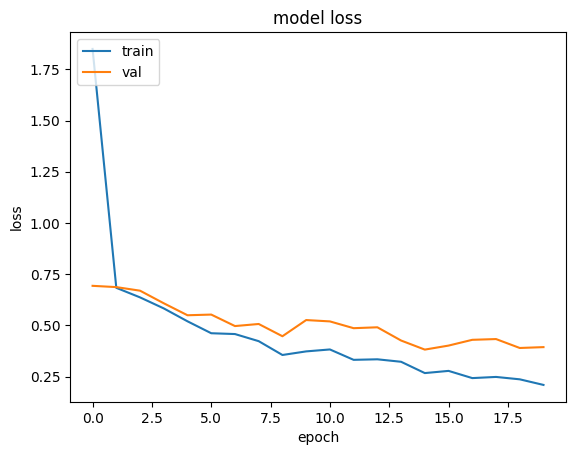

In [ ]:
import matplotlib.pyplot as plt

def plot_history_val(history):
  plt.plot(history.history["loss"])
  plt.plot(history.history["val_loss"])
  plt.title("model loss")
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(["train", "val"], loc="upper left")
  plt.show()

plot_history_val(history)

In [ ]:
# model evaluaion
results = model.evaluate(X_test,y_test, verbose=0)
y_pred = model.predict(X_test)
print("Test loss: {:.5f}".format(results[0]))
print("Test accuracy: {:.2f}%".format(results[1] * 100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 537ms/step
Test loss: 0.40538
Test accuracy: 84.92%


In [ ]:
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

confusion_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print(confusion_matrix)

[[53 12]
 [ 7 54]]


In [ ]:
y_true = []
y_pred = []

for actual_class in range(2):  # we have 2 classes
    for predicted_class in range(2):
        count = confusion_matrix[actual_class][predicted_class]
        y_true.extend([actual_class] * count)
        y_pred.extend([predicted_class] * count)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        65
           1       0.82      0.89      0.85        61

    accuracy                           0.85       126
   macro avg       0.85      0.85      0.85       126
weighted avg       0.85      0.85      0.85       126



In [ ]:
model.save('/content/drive/MyDrive/B3/DL/Egg_Model.keras')

In [ ]:
# load model to use
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/B3/DL/Egg_Model.keras')

Input image shape:  (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted label: Damaged
Confidence: 99.44955%


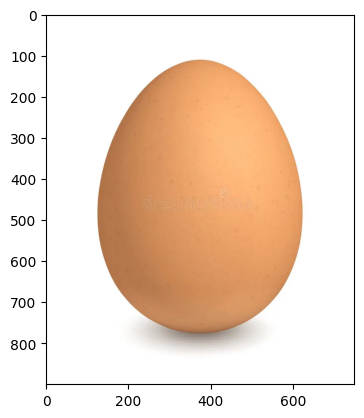

In [ ]:
#Test model with outside image

from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import cv2
import numpy as np

#input testing image here
img_path = "/content/drive/MyDrive/B3/DL/test_2.webp"

img=cv2.imread(img_path)
img=cv2.resize(img, (256,256))

x=np.expand_dims(img,axis=0)
x = x / 255.0

print("Input image shape: ",x.shape)

my_image=imread(img_path)
imshow(my_image)

preds=model.predict(x)
pred_class = np.argmax(preds, axis=1)[0]
confidence = preds[0][pred_class] * 100

class_names = ['Damaged', 'Not Damaged']
print(f"Predicted label: {class_names[pred_class]}")
print(f"Confidence: {confidence:.5f}%")